Install all packages

In [1]:
!pip install scikit-learn arff numpy pandas seaborn matplotlib scipy


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.io import arff

In [3]:
# Load the dataset
data, meta = arff.loadarff("./data/bodyfat.arff")
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print("Basic Information:")
print(df.info())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   Age      252 non-null    float64
 2   Weight   252 non-null    float64
 3   Height   252 non-null    float64
 4   Neck     252 non-null    float64
 5   Chest    252 non-null    float64
 6   Abdomen  252 non-null    float64
 7   Hip      252 non-null    float64
 8   Thigh    252 non-null    float64
 9   Knee     252 non-null    float64
 10  Ankle    252 non-null    float64
 11  Biceps   252 non-null    float64
 12  Forearm  252 non-null    float64
 13  Wrist    252 non-null    float64
 14  class    252 non-null    float64
dtypes: float64(15)
memory usage: 29.7 KB
None


In [4]:
meta

Dataset: 'bodyfat.names'
	Density's type is numeric
	Age's type is numeric
	Weight's type is numeric
	Height's type is numeric
	Neck's type is numeric
	Chest's type is numeric
	Abdomen's type is numeric
	Hip's type is numeric
	Thigh's type is numeric
	Knee's type is numeric
	Ankle's type is numeric
	Biceps's type is numeric
	Forearm's type is numeric
	Wrist's type is numeric
	class's type is numeric

## Key points

- All variables are numeric.
- There are no binary or categorical features.
- Values in each column are continuous.
- The dataset does not contain any missing values.
- The target column labeled "class" contains numeric values representing the body fat percentage.

In [28]:
# lowest / highest class value.
lowest_class_value = df['class'].min()
max_class_value = df['class'].max()
print("The lowest value of the 'class' attribute is:", lowest_class_value)
print("The max value of the 'class' attribute is:", max_class_value)

The lowest value of the 'class' attribute is: 0.0
The max value of the 'class' attribute is: 47.5
The max difference in age is  59.0
The max difference in weight is 244.65 lbs or 110.97 kg


In [29]:
print("The max difference in age is ", df['Age'].max() - df['Age'].min())

conversion_factor_lbs_to_kg = 0.453592
max_difference_lbs = df['Weight'].max() - df['Weight'].min()
max_difference_kg = max_difference_lbs * conversion_factor_lbs_to_kg

print(f"The max difference in weight is {max_difference_lbs:.2f} lbs or {max_difference_kg:.2f} kg")

The max difference in age is  59.0
The max difference in weight is 244.65 lbs or 110.97 kg


Plots:

['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest']


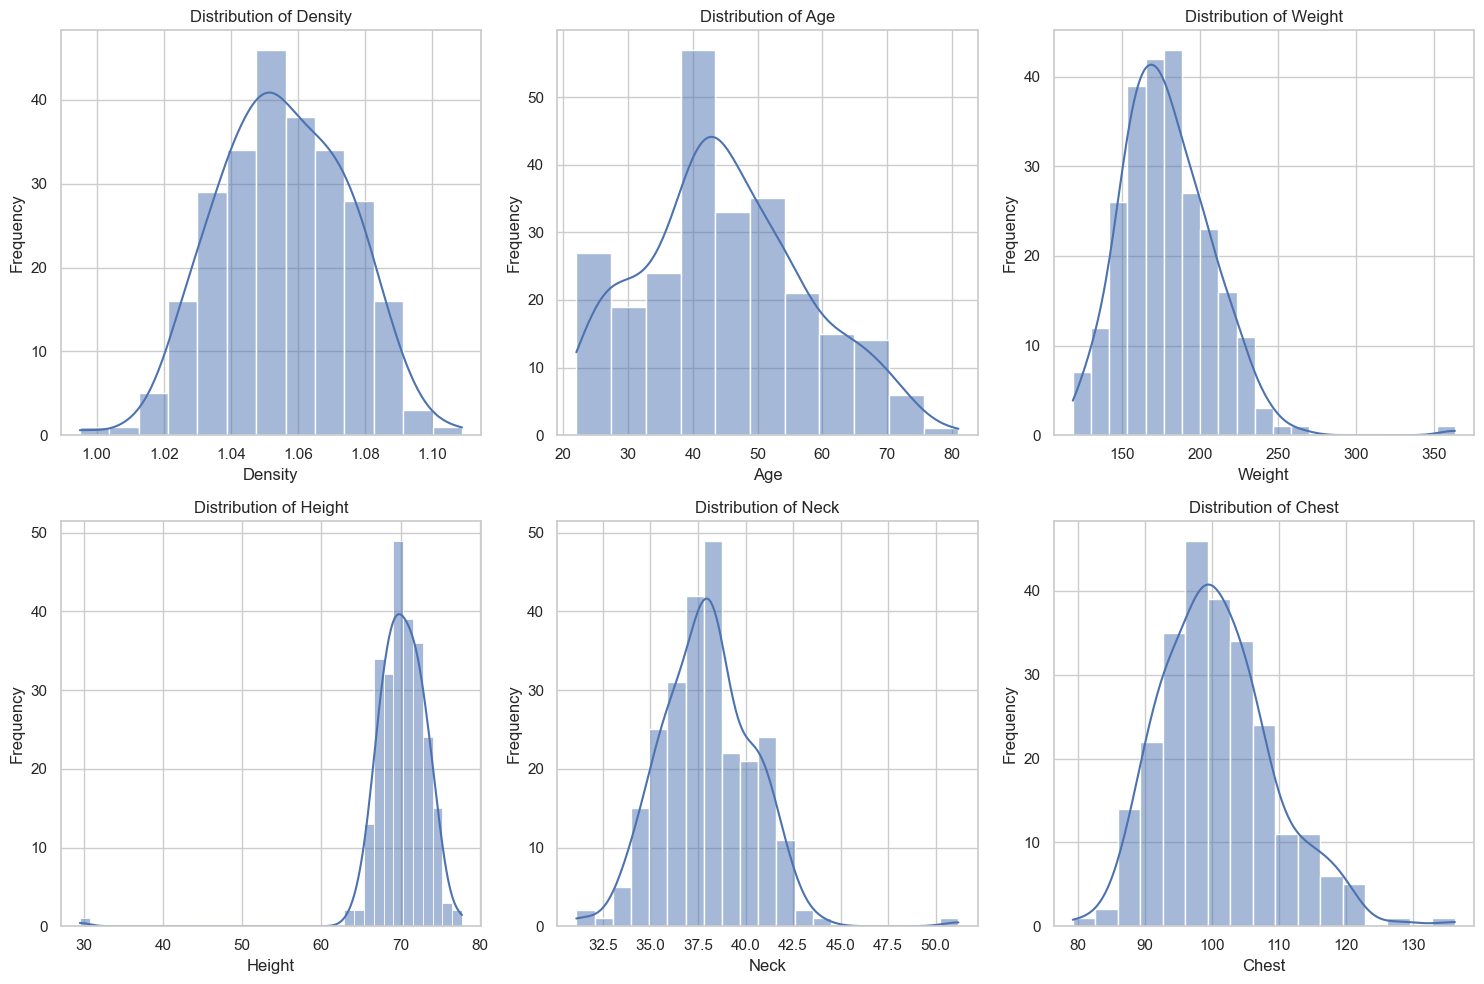

In [23]:
# Plot histograms for the first 6 attributes:
input_attributes = df.columns.tolist()[:6]
print(input_attributes)

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a 3x2 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over the input attributes and create histograms
for i, col in enumerate(input_attributes):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Target attribute plot:

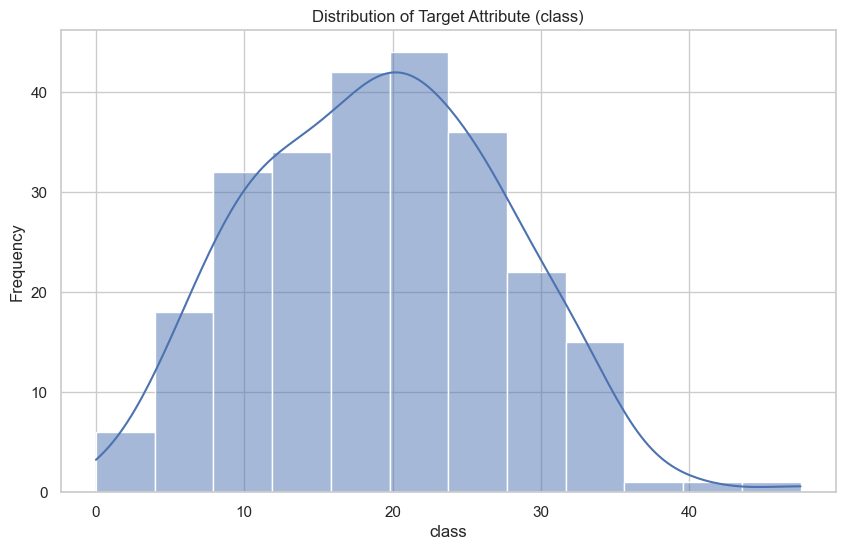

In [24]:
# Plot histogram for the target attribute
plt.figure(figsize=(10, 6))
sns.histplot(df['class'], kde=True)
plt.title('Distribution of Target Attribute (class)')
plt.xlabel('class')
plt.ylabel('Frequency')
plt.show()

## Summary
1. There are no missing values.
2. The body fat distribution ranges from 0% to 46%. This must be an incorrect entry since it is impossible for a human to have 0% body fat.
3. One person in the dataset is recorded as being 30 inches (76 cm) tall. This could either represent a person of short stature or be an error in the data.
4. Overall this dataset represents a more or less balanced distribution of its data.